In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
# Creating the Dataset

def CreateDataset(n=5000):
    x = []
    y = []
    # print(x.shape)
    for i in range(n):
        a = np.random.randint(2, 25)
        rand = np.random.randint(0, a, size=2)
        if rand[0] == rand[1]:
            rand[1] = (rand[1] + 1) % a
        x1 = torch.zeros((a, 2))
        for j in range(a):
            x1[j][0] = np.random.uniform(0, 1)
            if j == rand[0] or j == rand[1]:
                x1[j][1] = 1
        x.append(x1)
        y.append(x1[rand[0]][0] + x1[rand[1]][0])

    return x, y
data, labels = CreateDataset()


In [3]:
class ELMON(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ELMON, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # torch.autograd.set_detect_anomaly(True)
        self.Wxh = nn.Parameter(torch.randn(input_size, hidden_size))
        self.Whh = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.Why = nn.Parameter(torch.randn(hidden_size, output_size))
        self.bh = nn.Parameter(torch.randn(hidden_size))
        self.by = nn.Parameter(torch.randn(output_size))
        self.h1 = torch.zeros(hidden_size)

    def forward(self, x):
        self.h1 = torch.zeros(self.hidden_size)
        for i in range(x.shape[0]):
            # print(x[i].shape)
            self.h1 = torch.matmul(self.Wxh.T, x[i]) 
            self.h1 = self.h1 + torch.matmul(self.Whh.T, self.h1) + self.bh
            self.h1 = torch.tanh(self.h1)
        y = torch.matmul(self.Why.T, self.h1) + self.by
        return y
    
    
        

In [4]:
# Training the model
elmon = ELMON(2, 2, 1)
loss = nn.MSELoss()
optim = torch.optim.Adam(elmon.parameters(), lr=0.001)

# print(f"data: {data.shape}")
# print(f"labels: {labels.shape}")

l1 = []
for i in range(10):
    a = 0
    j = 0
    for j in range(len(data)):
        optim.zero_grad()
        # print(data[j].shape)
        y = elmon(data[j])
        loss = torch.mean((y - labels[j])**2)
        loss.backward()
        optim.step()
        a += loss.item()
        j += 1
    print(f"Epoch: {i} Loss: {a}")
    l1.append(a)

Epoch: 0 Loss: 3938.632140538369
Epoch: 1 Loss: 882.6488551363445
Epoch: 2 Loss: 861.7132780472311
Epoch: 3 Loss: 814.5283248734695
Epoch: 4 Loss: 800.6758655206178
Epoch: 5 Loss: 800.0578723832997
Epoch: 6 Loss: 798.77412685156
Epoch: 7 Loss: 792.7578079507263
Epoch: 8 Loss: 782.512686433837
Epoch: 9 Loss: 778.0449678651295


In [5]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # Weights
        self.Wf = nn.Parameter(torch.randn(input_size, hidden_size))
        self.Uf = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.Wi = nn.Parameter(torch.randn(input_size, hidden_size))
        self.Ui = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.Wc = nn.Parameter(torch.randn(input_size, hidden_size))
        self.Uc = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.Wo = nn.Parameter(torch.randn(input_size, hidden_size))
        self.Uo = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.Wy = nn.Parameter(torch.randn(hidden_size, output_size))
        # Biases
        self.bf = nn.Parameter(torch.randn(hidden_size))
        self.bi = nn.Parameter(torch.randn(hidden_size))
        self.bc = nn.Parameter(torch.randn(hidden_size))
        self.bo = nn.Parameter(torch.randn(hidden_size))
        self.by = nn.Parameter(torch.randn(output_size))
        # Hidden states
        self.h = torch.zeros(hidden_size)
        self.c = torch.zeros(hidden_size)
        
    def forward(self, x):
        self.h = torch.zeros(self.hidden_size)
        self.c = torch.zeros(self.hidden_size)
        for i in range(x.shape[0]):
            # print(x[i].shape)
            f = torch.matmul(self.Wf.T, x[i]) 
            f = f + torch.matmul(self.Uf.T, self.h) 
            f = f + self.bf
            f = torch.sigmoid(f)
            j = torch.matmul(self.Wi.T, x[i]) + torch.matmul(self.Ui.T, self.h) + self.bi
            j = torch.sigmoid(j)
            c = torch.matmul(self.Wc.T, x[i]) + torch.matmul(self.Uc.T, self.h) + self.bc
            c = torch.tanh(c)
            o = torch.matmul(self.Wo.T, x[i]) + torch.matmul(self.Uo.T, self.h) + self.bo
            o = torch.sigmoid(o)
            self.c = f * self.c + j * c
            self.h = o * torch.tanh(self.c)
        y = torch.matmul(self.Wy.T, self.h) + self.by
        return y
        
    # def train(self, x, y, lr=0.001, epochs=100):
    #     l = []
    #     for i in range(epochs):
    #         for j in range(x.shape[0]):
    #             y_pred = self.forward(x[j])
    #             loss = (y_pred - y[j]) ** 2
    #             l.append(loss.item())
    #             if j%100 == 0:
    #                 print(f"Epoch: {i}, dataPoint: {j}, Loss: {loss}")
    #             # Backpropagation
    #             loss.backward()
    #             # Update the weights
    #             with torch.no_grad():
    #                 self.Wf -= lr * self.Wf.grad
    #                 self.Uf -= lr * self.Uf.grad
    #                 self.Wi -= lr * self.Wi.grad
    #                 self.Ui -= lr * self.Ui.grad
    #                 self.Wc -= lr * self.Wc.grad
    #                 self.Uc -= lr * self.Uc.grad
    #                 self.Wo -= lr * self.Wo.grad
    #                 self.Uo -= lr * self.Uo.grad
    #                 self.Wy -= lr * self.Wy.grad
    #                 self.bf -= lr * self.bf.grad
    #                 self.bi -= lr * self.bi.grad
    #                 self.bc -= lr * self.bc.grad
    #                 self.bo -= lr * self.bo.grad
    #                 self.by -= lr * self.by.grad
    #                 # Zero the gradients
    #                 self.Wf.grad.zero_()
    #                 self.Uf.grad.zero_()
    #                 self.Wi.grad.zero_()
    #                 self.Ui.grad.zero_()
    #                 self.Wc.grad.zero_()
    #                 self.Uc.grad.zero_()
    #                 self.Wo.grad.zero_()
    #                 self.Uo.grad.zero_()
    #                 self.Wy.grad.zero_()
    #                 self.bf.grad.zero_()
    #                 self.bi.grad.zero_()
    #                 self.bc.grad.zero_()
    #                 self.bo.grad.zero_()
    #                 self.by.grad.zero_()
    #     return l

In [6]:
lstm = LSTM(2, 2, 1)
loss_fn = torch.nn.MSELoss()
optim = torch.optim.Adam(lstm.parameters(), lr=0.001)
l2 = []

for i in range(10):
    a = 0
    for j in range(len(data)):
        optim.zero_grad()
        y = lstm(data[j])
        loss = torch.mean((y - labels[j])**2)
        loss.backward()
        optim.step()
        a += loss.item()
    print(f"Epoch: {i} Loss: {a}")
    l2.append(a)

Epoch: 0 Loss: 830.8766927221778
Epoch: 1 Loss: 179.00812880077268
Epoch: 2 Loss: 35.97748314195684
Epoch: 3 Loss: 21.718990469863154
Epoch: 4 Loss: 16.71486498056386
Epoch: 5 Loss: 13.849532601593644
Epoch: 6 Loss: 11.742757072153108
Epoch: 7 Loss: 10.110252250715675
Epoch: 8 Loss: 8.81853726338431
Epoch: 9 Loss: 7.777846142118037


In [7]:
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # Weights
        self.Wz = nn.Parameter(torch.randn(input_size, hidden_size))
        self.Uz = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.Wr = nn.Parameter(torch.randn(input_size, hidden_size))
        self.Ur = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.Wh = nn.Parameter(torch.randn(input_size, hidden_size))
        self.Uh = nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.Wy = nn.Parameter(torch.randn(hidden_size, output_size))
        # Biases
        self.bz = nn.Parameter(torch.randn(hidden_size))
        self.br = nn.Parameter(torch.randn(hidden_size))
        self.bh = nn.Parameter(torch.randn(hidden_size))
        self.by = nn.Parameter(torch.randn(output_size))
        # Hidden states
        self.h = torch.zeros(hidden_size)

    def forward(self, x):
        self.h = torch.zeros(self.hidden_size, requires_grad=True)
        for i in range(x.shape[0]):
            z = torch.matmul(self.Wz.T, x[i]) + torch.matmul(self.Uz.T, self.h) + self.bz
            z = torch.sigmoid(z)
            r = torch.matmul(self.Wr.T, x[i]) + torch.matmul(self.Ur.T, self.h) + self.br
            r = torch.sigmoid(r)
            h = torch.matmul(self.Wh.T, x[i]) + torch.matmul(self.Uh.T, r * self.h) + self.bh
            h = torch.tanh(h)
            self.h = (1 - z) * self.h + z * h
        y = torch.matmul(self.Wy.T, self.h) + self.by
        return y


In [8]:
gru = GRU(2, 2, 1)
loss_fn = torch.nn.MSELoss()
optim = torch.optim.Adam(gru.parameters(), lr=0.001)
l3 = []
for i in range(10):
    a = 0
    for j in range(len(data)):
        optim.zero_grad()
        y = gru(data[j])
        loss = torch.mean((y - labels[j])**2)
        loss.backward()
        optim.step()
        a += loss.item()
    print(f"Epoch: {i} Loss: {a}")
    l3.append(a)

Epoch: 0 Loss: 2267.2647904978835
Epoch: 1 Loss: 695.3672851238184
Epoch: 2 Loss: 138.77338225774594
Epoch: 3 Loss: 45.263443870378254
Epoch: 4 Loss: 27.554908439626182
Epoch: 5 Loss: 18.679015147238307
Epoch: 6 Loss: 13.52601674765125
Epoch: 7 Loss: 10.165361008075838
Epoch: 8 Loss: 7.847037297435897
Epoch: 9 Loss: 6.1894331421034465


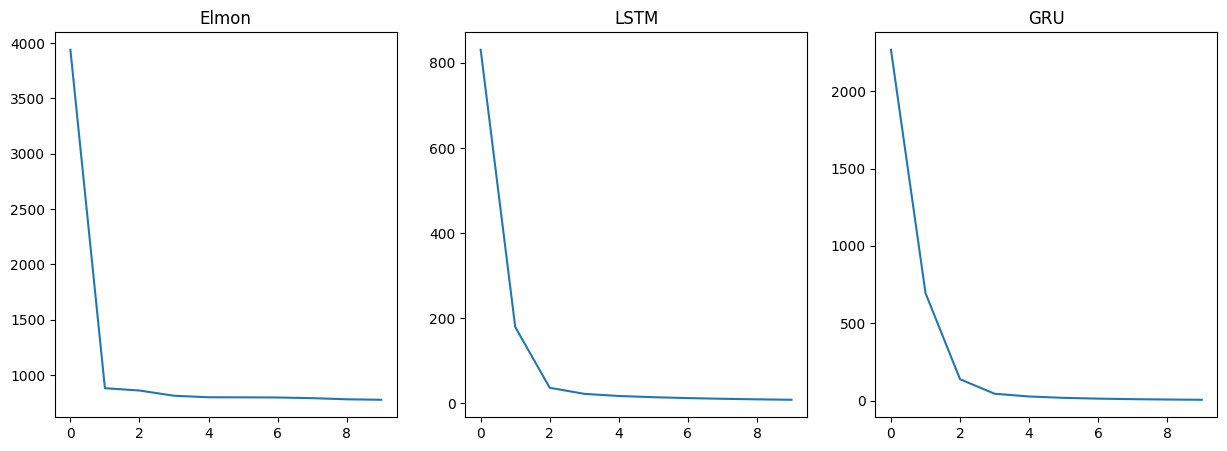

In [9]:
# Plotting subplots the loss for Elman, LSTM and GRU

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(l1)
plt.title("Elmon")
plt.subplot(1, 3, 2)
plt.plot(l2)
plt.title("LSTM")
plt.subplot(1, 3, 3)
plt.plot(l3)
plt.title("GRU")
plt.show()


In [10]:
x_test, y_test = CreateDataset(50)
y_out_test_Elman = []
y_out_test_LSTM = []
y_out_test_GRU = []
y_out = []
for i in range(len(y_test)):
    y_out_test_Elman.append(elmon(x_test[i]).item())
    y_out_test_LSTM.append(lstm(x_test[i]).item())
    y_out_test_GRU.append(gru(x_test[i]).item())
    y_out.append(1)


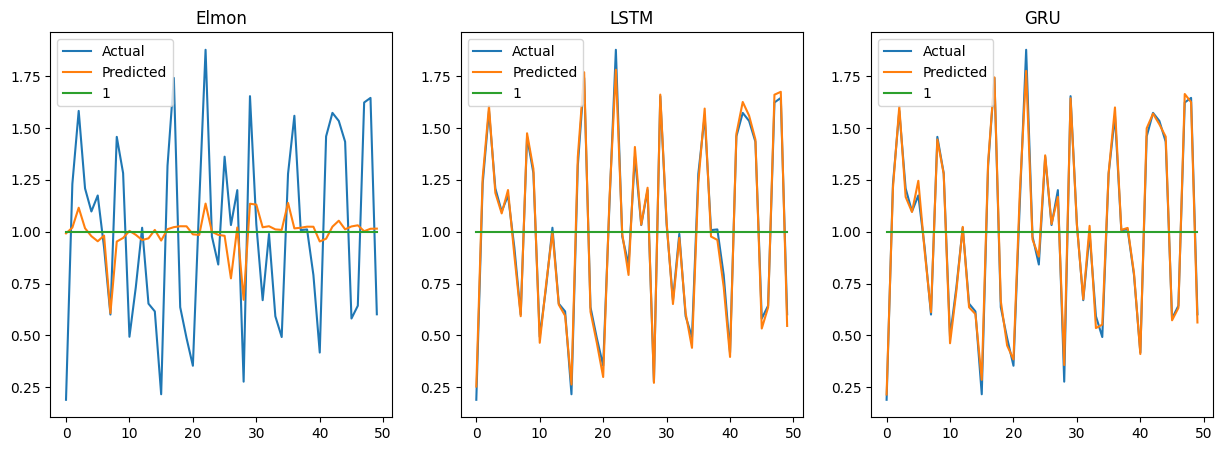

In [11]:
# Plotting the output of Elman, LSTM and GRU
# Subplots for Elman, LSTM and GRU

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(y_test, label="Actual")
plt.plot(y_out_test_Elman, label="Predicted")
plt.plot(y_out, label="1")
plt.legend()
plt.title("Elmon")
plt.subplot(1, 3, 2)
plt.plot(y_test, label="Actual")
plt.plot(y_out_test_LSTM, label="Predicted")
plt.plot(y_out, label="1")
plt.legend()
plt.title("LSTM")
plt.subplot(1, 3, 3)
plt.plot(y_test, label="Actual")
plt.plot(y_out_test_GRU, label="Predicted")
plt.plot(y_out, label="1")
plt.title("GRU")
plt.legend()